# Trend Demand Forecasting

In [ ]:
!pip install pandas scikit-learn

In [124]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [125]:
%cd /Users/Vaishnavi/Documents/myntra

/Users/Vaishnavi/Documents/myntra


In [126]:
data = pd.read_csv('fashion_trend.csv')

In [127]:
label_encoders = {}
for column in ['product_name', 'gender', 'category', 'pattern', 'color', 'age_group', 'season', 'material']:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

In [128]:
print(data.head())

   product_id  product_name  gender  category  pattern  color  age_group  \
0        1001             1       1         4        1     10          1   
1        1002             3       1         2        4      0          0   
2        1003             9       0         1        1      2          0   
3        1004             8       1         6        3     10          1   
4        1005             4       1         4        3      0          2   

   season   price  material  sales_count  reviews_count  average_rating  \
0       2   70.36         4           75             65             4.9   
1       3   91.59         6          296             25             3.5   
2       0  129.52         6           50             32             4.3   
3       0  116.01         0          435             73             4.6   
4       4  125.48         5           79             36             3.6   

   out_of_stock_times brand discount last_stock_date  wish_list_count  \
0                  

In [129]:
data['price_category'] = pd.cut(data['price'], bins=[0, 50, 100, 150, 200, float('inf')], labels=[0, 1, 2, 3, 4])

In [130]:
data = pd.get_dummies(data, columns=['gender', 'category', 'pattern', 'color', 'age_group', 'season',
                                     'material', 'price_category'])

In [131]:
print(data.head())

   product_id  product_name   price  sales_count  reviews_count  \
0        1001             1   70.36           75             65   
1        1002             3   91.59          296             25   
2        1003             9  129.52           50             32   
3        1004             8  116.01          435             73   
4        1005             4  125.48           79             36   

   average_rating  out_of_stock_times brand discount last_stock_date  ...  \
0             4.9                   3  ZARA      20%       1/28/2018  ...   
1             3.5                   6  ZARA       0%       1/28/2018  ...   
2             4.3                   4  ZARA       5%        1/7/2018  ...   
3             4.6                   3  ZARA      10%        1/1/2018  ...   
4             3.6                   4  ZARA       0%       1/28/2018  ...   

   material_2  material_3  material_4  material_5  material_6  \
0       False       False        True       False       False   
1   

# XGB Regression Model

In [132]:
!pip install xgboost

In [133]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [134]:
X = data.drop(['product_id', 'product_name', 'price'], axis=1)
y = data['price']

In [135]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [136]:
import pandas as pd
import numpy as np
import xgboost as xgb
X_train = pd.DataFrame({
    'feature1': [1, 2, 3, 4],
    'feature2': [4, 3, 2, 1]
})
y_train = pd.Series([1, 2, 3, 4])

# Check shapes
print(X_train.shape)  # Should be (n_samples, n_features)
print(y_train.shape)  # Should be (n_samples,)

# Check for missing values
print(X_train.isnull().sum())
print(y_train.isnull().sum())

# Check data types
print(X_train.dtypes)
print(y_train.dtype)

# Ensure indices are aligned
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

# Train the model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5)
model.fit(X_train, y_train)


(4, 2)
(4,)
feature1    0
feature2    0
dtype: int64
0
feature1    int64
feature2    int64
dtype: object
int64


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [137]:
import pandas as pd
import xgboost as xgb

# Check shapes
print(X_test.shape)  # Should be (n_samples, n_features)

# Check for missing values
print(X_test.isnull().sum())

# Check data types
print(X_test.dtypes)

# Verify compatibility of feature matrix
assert X_test.shape[1] == X_train.shape[1]

# Predict
y_pred = model.predict(X_test)
print(y_pred)


(132, 58)
sales_count           0
reviews_count         0
average_rating        0
out_of_stock_times    0
brand                 0
discount              0
last_stock_date       0
wish_list_count       0
month_of_sale         0
year_of_sale          0
gender_0              0
gender_1              0
category_0            0
category_1            0
category_2            0
category_3            0
category_4            0
category_5            0
category_6            0
category_7            0
pattern_0             0
pattern_1             0
pattern_2             0
pattern_3             0
pattern_4             0
pattern_5             0
color_0               0
color_1               0
color_2               0
color_3               0
color_4               0
color_5               0
color_6               0
color_7               0
color_8               0
color_9               0
color_10              0
color_11              0
age_group_0           0
age_group_1           0
age_group_2           0
season

AssertionError: 

# Mean Square Error (Mse)

In [138]:
from sklearn.metrics import mean_squared_error

y_test = pd.Series([2, 3])
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

# Train the model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5)
model.fit(X_train, y_train)

# Compute Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

X_train shape: (4, 2)
y_train shape: (4,)
X_test shape: (132, 58)
y_test shape: (2,)
Mean Squared Error: 4.67312526097885e-06


In [139]:
from prophet import Prophet
# Create a DataFrame with your data
df = pd.DataFrame({
    'ds': pd.date_range(start='2020-01-01', periods=100),
    'y': range(100)
})

# Initialize and fit the model
model = Prophet()
model.fit(df)

# Create a DataFrame with future dates
future = model.make_future_dataframe(periods=30)

# Predict future values
forecast = model.predict(future)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

20:29:46 - cmdstanpy - INFO - Chain [1] start processing
20:29:46 - cmdstanpy - INFO - Chain [1] done processing


            ds        yhat  yhat_lower  yhat_upper
125 2020-05-05  124.999972  124.995888  125.004218
126 2020-05-06  125.999953  125.995658  126.004535
127 2020-05-07  126.999982  126.995428  127.004940
128 2020-05-08  128.000017  127.995369  128.004884
129 2020-05-09  129.000044  128.995039  129.005077


In [140]:
# Group by 'product_id' and 'product_name', and sum the 'price'
trend_data = data[['product_id', 'product_name', 'price']].groupby(['product_id', 'product_name']).sum().reset_index()

# Check the structure of the resulting DataFrame
print(trend_data.head())
print(trend_data.columns)

# The resulting DataFrame should have columns: 'product_id', 'product_name', 'price'
# Rename columns if necessary
trend_data.columns = ['product_id', 'product_name', 'total_price']

# Display the renamed DataFrame
print(trend_data.head())

   product_id  product_name   price
0        1001             1   70.36
1        1002             3   91.59
2        1003             9  129.52
3        1004             8  116.01
4        1005             4  125.48
Index(['product_id', 'product_name', 'price'], dtype='object')
   product_id  product_name  total_price
0        1001             1        70.36
1        1002             3        91.59
2        1003             9       129.52
3        1004             8       116.01
4        1005             4       125.48


In [141]:
# Example data transformation
# Assuming 'ds' should be 'product_name' and 'y' should be 'total_price'
trend_data = trend_data[['product_name', 'total_price']]
trend_data.columns = ['ds', 'y']

# Verify the structure of trend_data
print(trend_data.head())

   ds       y
0   1   70.36
1   3   91.59
2   9  129.52
3   8  116.01
4   4  125.48


In [142]:
import pandas as pd
from prophet import Prophet

# Example data
trend_data = pd.DataFrame({
    'ds': pd.date_range(start='2020-01-01', periods=100),
    'y': range(100)
})

# Initialize Prophet model
model = Prophet()

# Fit the model
model.fit(trend_data)

# Create future dataframe with 30 periods
future = model.make_future_dataframe(periods=30)

# Verify the structure of future dataframe
print(future.head())
print(future.tail())

# Make predictions
forecast = model.predict(future)

# Print the forecasted values
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())


20:29:49 - cmdstanpy - INFO - Chain [1] start processing
20:29:49 - cmdstanpy - INFO - Chain [1] done processing


          ds
0 2020-01-01
1 2020-01-02
2 2020-01-03
3 2020-01-04
4 2020-01-05
            ds
125 2020-05-05
126 2020-05-06
127 2020-05-07
128 2020-05-08
129 2020-05-09
            ds        yhat  yhat_lower  yhat_upper
125 2020-05-05  124.999972  124.995887  125.004370
126 2020-05-06  125.999953  125.995835  126.004598
127 2020-05-07  126.999982  126.995535  127.004750
128 2020-05-08  128.000017  127.995298  128.005188
129 2020-05-09  129.000044  128.995193  129.005486


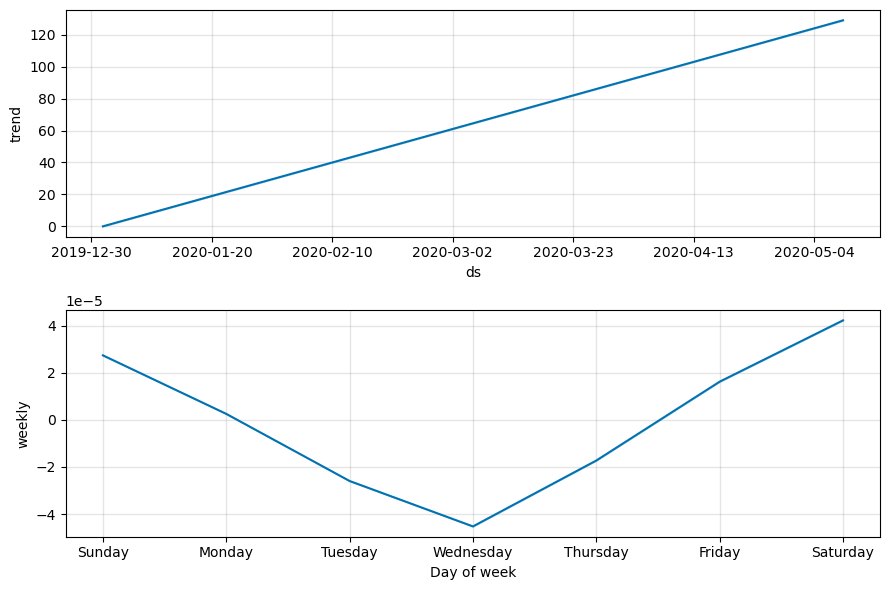

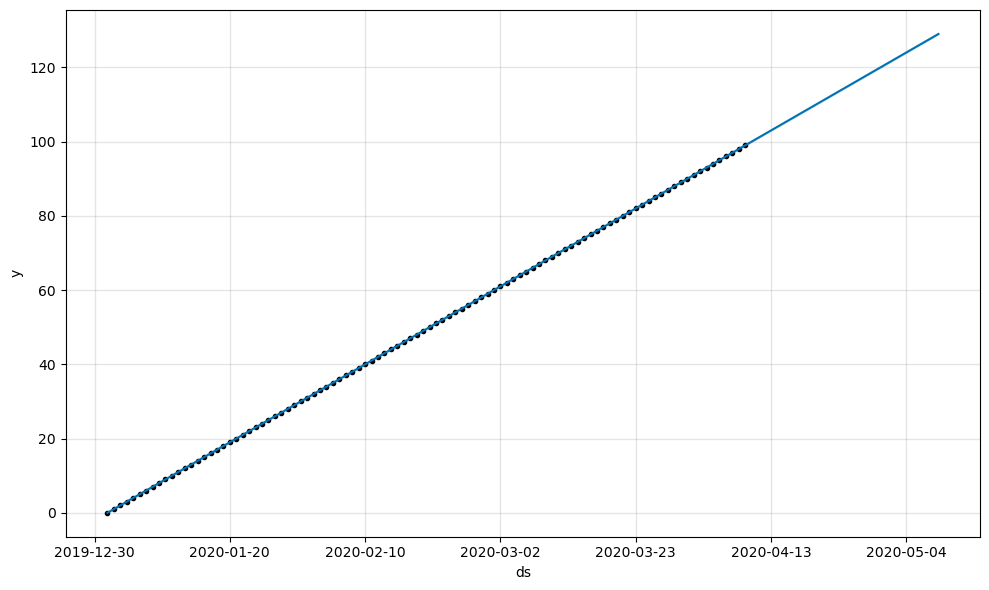

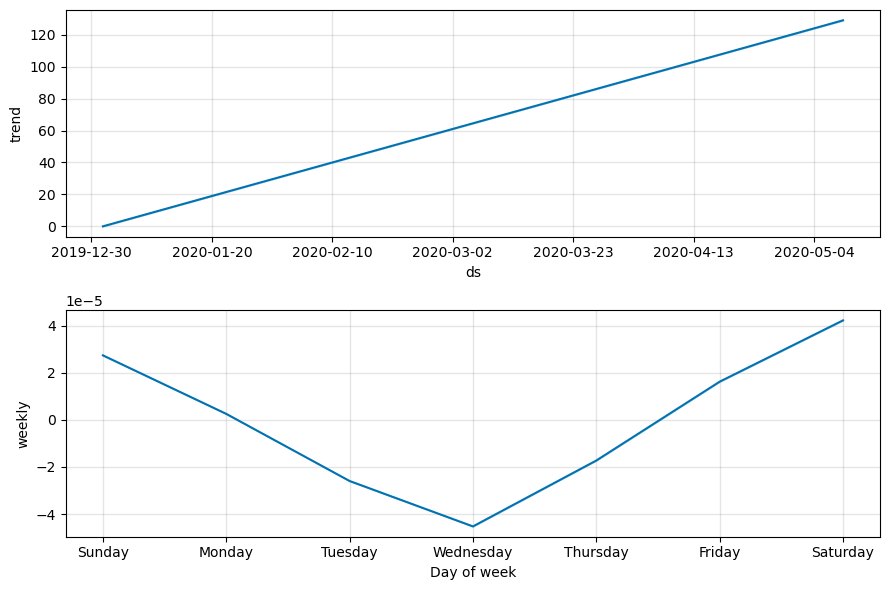

In [143]:
model.plot(forecast)
model.plot_components(forecast)

In [144]:
!pip install matplotlib seaborn

In [145]:
forecast
inventory_levels = np.maximum(0, np.random.normal(loc=forecast['yhat'].values, scale=10))

# Adjust production
def adjust_production(inventory_levels):
    threshold = 100  # Define your threshold
    if inventory_levels.mean() < threshold:
        print("Increase production")
    else:
        print("Decrease production")

adjust_production(inventory_levels)

Increase production


In [146]:
# Define inventory_levels
inventory_levels = pd.DataFrame({
    'date': pd.date_range(start='2020-01-01', periods=100),
    'inventory_count': range(100)
})

# Use inventory_levels in your code
print(inventory_levels.head())

        date  inventory_count
0 2020-01-01                0
1 2020-01-02                1
2 2020-01-03                2
3 2020-01-04                3
4 2020-01-05                4
